## Calculation of RMS value and plotting 
- This notebook reads the file with the raw signals and calculates the RMS values.
- Then it produces a plot with all eight sensors data .


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

file_name='fist_1'
file_name_csv = file_name + '.csv'

# Read the CSV file
df = pd.read_csv(file_name_csv)

# Extract the sensor columns
sensor_columns = df.columns
for i in range(0, len(sensor_columns)):
    df.rename(columns = {sensor_columns[i]:i}, inplace = True)

#print(df.columns)

In [20]:
window_size = 20
variance_values = df.rolling(window_size).var()
#print(variance_values)
variance_values = variance_values.iloc[20:,]
#print(variance_values)

In [21]:
def calculate_variance_non_overlapping(signal, window_size):
    N = len(signal)  # Total number of samples
    num_windows = N // window_size  # Number of non-overlapping windows

    variances = []
    for i in range(num_windows):
        start_index = i * window_size
        end_index = start_index + window_size
        window = signal[start_index:end_index]

        squared_sum = np.sum(np.square(window))  # Sum of squared values
        variance = (1 / window_size) * squared_sum
        variances.append(variance)

    return variances


In [22]:
rms_row_count = (int(len(df) / 20) - 1)

In [23]:
rms_initial_values =  np.arange(start=0,stop= rms_row_count*8).reshape(rms_row_count,8)
rms_initial_values[rms_initial_values > 0] = 0
var_initial_values =  np.arange(start=0,stop= rms_row_count*8).reshape(rms_row_count,8)
var_initial_values[rms_initial_values > 0] = 0

In [24]:
indexes = np.arange(start=0,stop= rms_row_count)
var_indexes = np.arange(start=0,stop= rms_row_count)

In [25]:
df_result = pd.DataFrame(rms_initial_values, indexes, [1,2,3,4,5,6,7,8])
print(df_result)

     1  2  3  4  5  6  7  8
0    0  0  0  0  0  0  0  0
1    0  0  0  0  0  0  0  0
2    0  0  0  0  0  0  0  0
3    0  0  0  0  0  0  0  0
4    0  0  0  0  0  0  0  0
..  .. .. .. .. .. .. .. ..
325  0  0  0  0  0  0  0  0
326  0  0  0  0  0  0  0  0
327  0  0  0  0  0  0  0  0
328  0  0  0  0  0  0  0  0
329  0  0  0  0  0  0  0  0

[330 rows x 8 columns]


In [26]:
for i in range(8):
    df_sensor = df[i]
    temp_row = []
    for j in range(int(len(df) / 20) - 1):
        temp_df = df_sensor[(j*20): (j+1)*20]
        temp_df=temp_df.reset_index(drop=True)
        #temp_df = pd.DataFrame([rmsValue(temp_df)])
        temp_df= calculate_variance_non_overlapping(temp_df, 20)
        df_result[i+1].iloc[j] = rmsValue(temp_df)
    

C:\Users\Dide\AppData\Local\Temp\ipykernel_17592\3968908617.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[i+1].iloc[j] = rmsValue(temp_df)


In [27]:
print(df_result)

         1      2      3      4       5      6      7       8
0    17.55  17.35  26.40  21.25   80.35  24.85  18.75  116.80
1    21.40  29.25  52.15  23.60  113.60  16.20   9.15  197.25
2    13.25  15.60  34.35   7.00   55.55  15.85   9.90   91.80
3     9.65  12.70  29.60  16.30   13.85   9.55   8.55   34.80
4     9.90  10.15  17.40  11.90    8.10  15.10   5.85   53.05
..     ...    ...    ...    ...     ...    ...    ...     ...
325  14.00  10.25  38.20  18.55   19.30   7.45   3.05  100.10
326  12.05  11.40  37.20  19.90   18.75   9.70   2.80  114.05
327  17.75  12.30  43.10  17.45   22.80   6.65   5.00  117.95
328  12.85   6.00  48.35  16.35   31.00   8.45   5.45  122.30
329  19.45  14.80  37.55  24.95   32.35   9.60   3.50  161.30

[330 rows x 8 columns]


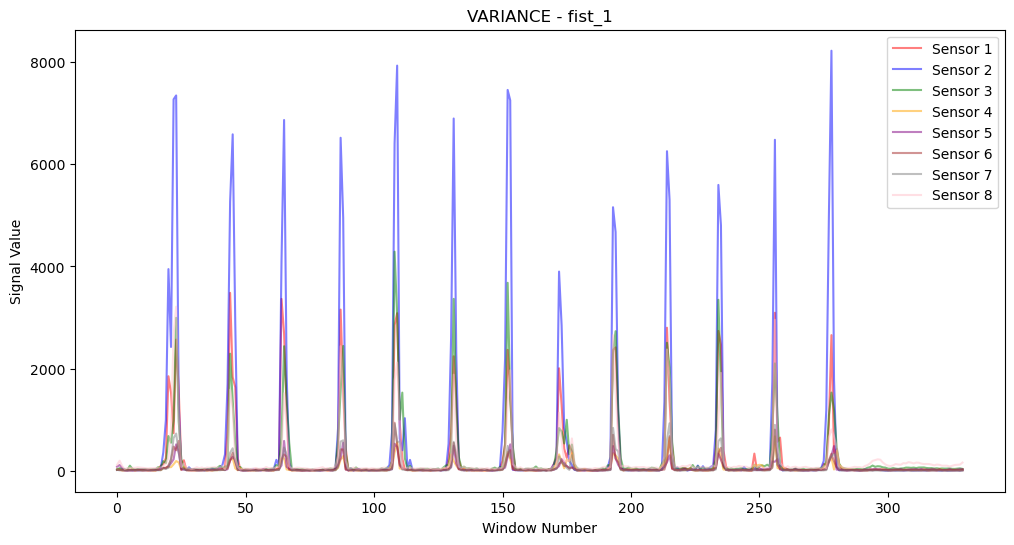

In [29]:

time_values = np.arange(rms_row_count) 
time_values2 = np.arange(var_row_count) 


# Define legend names and colors
legend_names = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink']

# Set the plot size
plt.figure(figsize=(12, 6))  # Adjust figsize as needed

# Plot each sensor with custom legend names and colors
for i in range (8):
    plt.plot(time_values, df_result[i+1], label=legend_names[i], color=colors[i], alpha=0.5)


# Plot RMS values for each sensor
#plt.plot(time_values, df_rms.repeat(len(time_values)), color='black', label='RMS')
#plt.plot(time_values[:len(df_result)], df_result, color='blue', label='RMS')

# Set plot labels and title
plt.xlabel('Window Number')
plt.ylabel('Signal Value')
plt.title('VARIANCE - ' +  file_name)

# Set y-axis limits based on the minimum and maximum values of the dataset
y_min = df.min().min()  # Minimum value across all columns
y_max = df.max().max()  # Maximum value across all columns
#plt.ylim(-10, 120)
#plt.xlim(35,55)

# Add legend
plt.legend()

# Display the plot
plt.show()
